# Principal Component Analysis

Goal:  can we distill 481 columms of weather-stations, holidays and days of week down to just a few dimensions that would be good to drive through some of the scikit-learn algorithms?  

Example from 

In [1]:
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
import pandas as pd
import numpy as np

# what if I used EVERYTHING in my original DF? 

target_df = pd.read_pickle("dataframes/target_df.pickle.gz", compression="infer").dropna()
y = target_df['sum_spp_load']

# drop the target, "opday" which is a sequential date, and the SUM_CDD and SUM_HDD columns (if they exist)
try: 
    Xdf = target_df.drop(['sum_spp_load', 'opday', 'SUM_CDD', 'SUM_HDD'],axis=1)
except: 
    Xdf = target_df.drop(['sum_spp_load', 'opday'],axis=1)



In [2]:
# from https://www.ritchieng.com/pandas-scikit-learn/ convert pandas to numpy
feature_cols = Xdf.columns.values
X = Xdf.loc[:, feature_cols]
X.shape

(1535, 481)

In [3]:
feature_cols

array(['is_Friday', 'is_Monday', 'is_Saturday', 'is_Sunday',
       'is_Thursday', 'is_Tuesday', 'is_Wednesday',
       'holiday_Christmas Day', 'holiday_Christmas Eve',
       'holiday_Day After Thanksgiving', 'holiday_Independence Day',
       'holiday_Labor Day', 'holiday_Memorial Day',
       "holiday_New Year's Day", 'holiday_Thanksgiving', 'is_holiday',
       'TMIN_AR_FAYETTEVILLE_DRAKE_FLD', 'TMIN_AR_FT_SMITH_RGNL_AP',
       'TMIN_AR_HARRISON_BOONE_CO_AP', 'TMIN_AR_HOT_SPRINGS_ASOS',
       'TMIN_AR_LITTLE_ROCK', 'TMIN_AR_LITTLE_ROCK_AP_ADAMS_FLD',
       'TMIN_AR_MOUNTAIN_HOME_BAXTER_AP', 'TMIN_AR_MOUNT_IDA_ASOS',
       'TMIN_AR_TEXARKANA_WEBB_FLD', 'TMIN_CO_ALAMOSA_SAN_LUIS_AP',
       'TMIN_CO_BURLINGTON_CARSON_AP', 'TMIN_CO_COLORADO_SPRINGS_MUNI_AP',
       'TMIN_CO_DENVER_CENTENNIAL_AP', 'TMIN_CO_DENVER_INTL_AP',
       'TMIN_CO_PUEBLO_MEM_AP', 'TMIN_IA_AMES_MUNI_AP',
       'TMIN_IA_DES_MOINES_INTL_AP', 'TMIN_IA_ESTHERVILLE_MUNI_AP',
       'TMIN_IA_MARSHALLTOWN_MUNI_AP

The data set has 1535 samples (individual operating dates) in it. It has 481 dimensions; some are very similar to others due to locality of weather stations. 


In [4]:
pca = PCA(n_components=4, whiten=True).fit(X)
X_pca = pca.transform(X)

What we have done is distill our 481D data set down to 4D. 

In [5]:
print(pca.components_)

[[ 6.11918398e-06 -9.78973847e-06 -9.13840106e-06 ...  3.95153924e-02
   6.14817929e-02  6.60474860e-02]
 [-1.14473904e-04  7.36616812e-05 -1.85685223e-04 ... -8.86505976e-02
   6.46815612e-02  7.25204984e-02]
 [ 2.09305092e-04 -1.62966824e-04 -5.04017409e-05 ...  3.96592103e-02
  -9.28866162e-02 -4.39117310e-02]
 [-4.16225345e-05  4.65696917e-05 -4.03868778e-05 ...  7.52117947e-02
   1.16648312e-01  1.10077433e-01]]


In [6]:
X_pca.shape

(1535, 4)

Let's see how much information we've managed to preserve:

In [7]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.87350987 0.02950356 0.02366626 0.01795975]
0.9446394441561509


Eh, only 94.4% of the variation in the dataset is captured in 4 dimensions. In testing this code, it takes 50 dimensions to capture 99% of the variation. 

This leads to me to believe that an alternative approach is needed; I'll look into a genetic algorithm for feature selection for the appropriate weather stations to predict demand in the utility footprint.

In [8]:
# important numpy arrary manipulation operations: 
# http://www.cs.cornell.edu/courses/cs4670/2016sp/lectures/lec06_numpy.pdf
X_pca[:,1]


array([-0.02142201, -0.20651393, -0.19560379, ...,  0.45007585,
       -0.5417372 , -0.68311913])

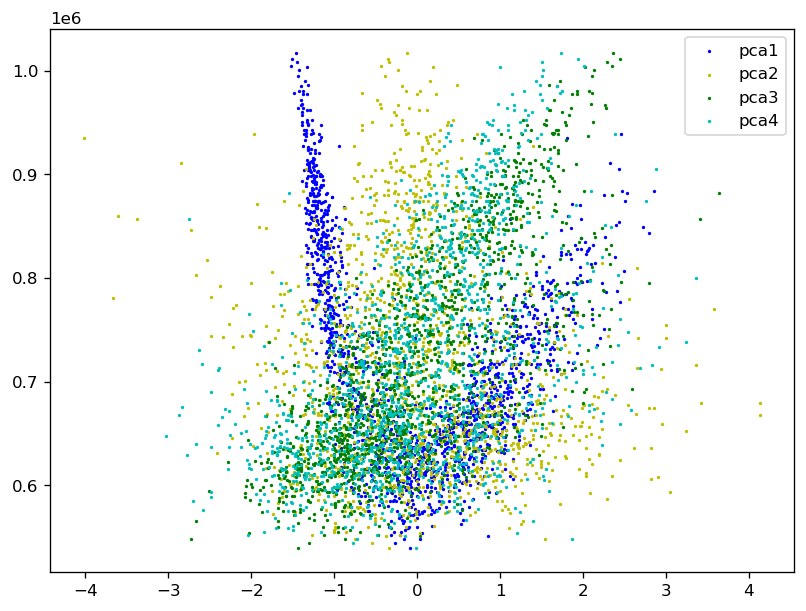

In [9]:


%matplotlib inline
from pylab import *
#pl.figure()
pl.figure(figsize=(8, 6), dpi=120)
pl.scatter(X_pca[:,0], y,  c="b", label="pca1", s=1)
pl.scatter(X_pca[:,1], y,  c="y", label="pca2", s=1)
pl.scatter(X_pca[:,2], y,  c="g", label="pca3", s=1)
pl.scatter(X_pca[:,3], y,  c="c", label="pca4", s=1)
pl.legend()
pl.show()
    